In [1]:
import pandas as pd

wellness_df= pd.read_csv("./raw_data/wellness.csv")
rpe_df= pd.read_csv("./raw_data/rpe.csv")
games_df= pd.read_csv("./raw_data/games.csv")
gps_df= pd.read_csv("./raw_data/gps.csv")
# wellness_df.dropna(inplace=True)
# rpe_df.dropna(inplace=True)
# games_df.dropna(inplace=True)
# gps_df.dropna(inplace=True)
gps_df['Longitude'] = gps_df.groupby('PlayerID')['Longitude'].fillna(method='ffill')
print(wellness_df.columns)
print(rpe_df.columns)
print(games_df.columns)
print(gps_df.columns)

Index(['Date', 'PlayerID', 'Fatigue', 'Soreness', 'Desire', 'Irritability',
       'BedTime', 'WakeTime', 'SleepHours', 'SleepQuality', 'MonitoringScore',
       'Pain', 'Illness', 'Menstruation', 'Nutrition', 'NutritionAdjustment',
       'USGMeasurement', 'USG', 'TrainingReadiness'],
      dtype='object')
Index(['Date', 'PlayerID', 'Training', 'SessionType', 'Duration', 'RPE',
       'SessionLoad', 'DailyLoad', 'AcuteLoad', 'ChronicLoad',
       'AcuteChronicRatio', 'ObjectiveRating', 'FocusRating',
       'BestOutOfMyself'],
      dtype='object')
Index(['GameID', 'Date', 'Tournament', 'TournamentGame', 'Team', 'Opponent',
       'Outcome', 'TeamPoints', 'TeamPointsAllowed'],
      dtype='object')
Index(['GameID', 'Half', 'PlayerID', 'FrameID', 'Time', 'GameClock', 'Speed',
       'AccelImpulse', 'AccelLoad', 'AccelX', 'AccelY', 'AccelZ', 'Longitude',
       'Latitude'],
      dtype='object')


In [2]:
print(len(gps_df))
#print(gps_df.head())

print(len(gps_df) - gps_df['Longitude'].count())
gps_df.dropna(inplace = True)
print(len(gps_df))

4570160
7
4570153


In [3]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from factor_analyzer.factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

print(gps_df.columns)
gps_df['Time'] = pd.to_datetime(gps_df.Time, format = '%H:%M:%S')
gps_df['TimeInSeconds'] = gps_df.Time.dt.hour * 3600 + gps_df.Time.dt.minute * 60 + gps_df.Time.dt.second
gps_df['GameClock'] = pd.to_datetime(gps_df.GameClock, format = '%H:%M:%S')
gps_df['GameClockInSeconds'] = gps_df.GameClock.dt.hour * 3600 + gps_df.GameClock.dt.minute * 60 + gps_df.GameClock.dt.second
player_data = gps_df.groupby('PlayerID',as_index = False).mean()

new_data = player_data.drop(['GameID','Half','PlayerID','FrameID'], axis=1)
player_data.head()

Index(['GameID', 'Half', 'PlayerID', 'FrameID', 'Time', 'GameClock', 'Speed',
       'AccelImpulse', 'AccelLoad', 'AccelX', 'AccelY', 'AccelZ', 'Longitude',
       'Latitude'],
      dtype='object')


,PlayerID,GameID,Half,FrameID,Speed,AccelImpulse,AccelLoad,AccelX,AccelY,AccelZ,Longitude,Latitude,TimeInSeconds,GameClockInSeconds
0,1,24.408629,1.502777,2600.307058,1.458636,1.200927,0.023339,-0.126561,0.508641,0.684284,-13.500557,33.268763,51201.055709,470.747159
1,2,19.573893,1.496852,2607.325098,1.037175,0.881994,0.020449,0.052635,0.768138,0.524536,7.806169,24.077370,50113.687888,468.960619
2,3,18.254155,1.490334,2646.834458,1.302805,1.010284,0.016925,0.017612,0.807178,0.462286,35.055545,14.159077,49851.420231,470.173836
3,4,19.641452,1.498507,2600.610423,1.187677,1.109686,0.018231,-0.010219,0.842286,0.544878,5.369631,23.835324,49960.163917,468.983964
4,5,24.408715,1.502775,2600.347476,0.944265,0.821855,0.013843,-0.079326,0.825949,0.404541,-13.499155,33.268214,51201.056056,470.750459


(4570153, 16) Index(['GameID', 'Half', 'PlayerID', 'FrameID', 'Time', 'GameClock', 'Speed',
       'AccelImpulse', 'AccelLoad', 'AccelX', 'AccelY', 'AccelZ', 'Longitude',
       'Latitude', 'TimeInSeconds', 'GameClockInSeconds'],
      dtype='object')
195.36376099140384 4.788303756275974e-21
[0.70899787 0.59202318 0.78485244 0.18032777 0.4281548  0.66479685
 0.41164553 0.3982143  0.48972958 0.49078213] 0.5094014237789682


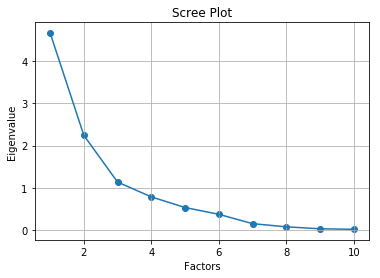

In [5]:
print(gps_df.shape,gps_df.columns)

chi_square_value,p_value=calculate_bartlett_sphericity(new_data)
print(chi_square_value, p_value)
kmo_all,kmo_model=calculate_kmo(new_data)
print(kmo_all,kmo_model)

fa = FactorAnalyzer(3, rotation="varimax")
#gps_df[gps_df.columns[~gps_df.columns.isin(['Time','GameClock'])]]
fa.fit(new_data)

ev, v = fa.get_eigenvalues()
plt.scatter(range(1,new_data.shape[1]+1),ev)
plt.plot(range(1,new_data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [6]:
import numpy as np
fa = FactorAnalyzer(3, rotation="varimax")
fa.fit(new_data)
print(new_data.columns)
print(fa.loadings_)
print(np.where(fa.loadings_>0.7))

Index(['Speed', 'AccelImpulse', 'AccelLoad', 'AccelX', 'AccelY', 'AccelZ',
       'Longitude', 'Latitude', 'TimeInSeconds', 'GameClockInSeconds'],
      dtype='object')
[[ 0.98392498  0.12402764 -0.05101752]
 [ 0.93066737 -0.11607117  0.03428061]
 [ 0.95326906  0.18839389 -0.07082124]
 [ 0.08242758 -0.18503188  0.99098588]
 [ 0.60141984  0.44487161  0.19554736]
 [ 0.37825654  0.43486858 -0.45077052]
 [ 0.15199048  0.86080868 -0.17651629]
 [-0.11371065 -0.88845775  0.04948214]
 [ 0.58842892  0.52886674 -0.23089403]
 [-0.00110707  0.48516588 -0.10980677]]
(array([0, 1, 2, 3, 6], dtype=int64), array([0, 0, 0, 2, 1], dtype=int64))


In [38]:
print(wellness_df.head())
print(rpe_df.head())
print(games_df.head())

         Date  PlayerID  Fatigue  Soreness  Desire  Irritability   BedTime  \
3  2018-07-21         4        2         3       5             4  00:30:00   
4  2018-07-21         5        5         3       4             4  23:45:00   
5  2018-07-21         7        2         2       5             4  22:00:00   
6  2018-07-21        10        2         2       4             4  22:30:00   
7  2018-07-21        11        4         3       6             4  23:00:00   

   WakeTime  SleepHours  SleepQuality  MonitoringScore Pain       Illness  \
3  07:00:00        6.50             1               15   No            No   
4  07:00:00        7.25             4               20   No            No   
5  07:00:00        9.00             3               16   No            No   
6  05:45:00        7.25             3               15   No  Slightly Off   
7  07:00:00        8.00             3               20   No  Slightly Off   

  Menstruation  Nutrition NutritionAdjustment USGMeasurement    USG 